# Practico Mentoria - Introduccion al Aprendizaje Automatico
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

---

### Importaciones

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga de los Datesets

In [4]:
path = 'https://raw.githubusercontent.com/diplodatos2019mentoria/Analisis_Visualizacion_Datos/master/'

df_player = pd.read_csv(path + 'Datasets/football_player.csv')
df_team = pd.read_csv(path + 'Datasets/football_team.csv')
df_match = pd.read_csv(path + 'Datasets/football_match.csv')

### Exploremos un poco los Datasets

> #### Players Dataset

In [5]:
print("Shape = {}".format(df_player.shape))

Shape = (9925, 44)


In [6]:
df_player.sample(10)

,player_name,birthday,age,height_m,weight_kg,imc,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
858,Ariel Borysiuk,1991-07-29,24,1.80,69.85,21.48,66.12,74.38,right,medium,...,70.46,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04
8529,Sava Miladinovic Bento,1991-01-02,25,1.83,72.12,21.56,58.00,64.43,right,medium,...,59.64,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00
2527,Dusan Tadic,1988-11-20,27,1.80,76.20,23.43,78.16,81.88,left,medium,...,84.32,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16
8473,Samuel Souprayen,1989-02-18,27,1.88,74.84,21.18,64.24,71.76,left,medium,...,46.52,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19
1958,Daniele Croce,1982-09-09,33,1.73,68.04,22.81,67.68,67.68,right,high,...,68.47,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74
4555,John Arne Riise,1980-09-24,35,1.88,82.10,23.24,76.32,77.64,left,high,...,64.14,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68
8408,Saidy Janko,1995-10-22,20,1.78,69.85,22.10,62.13,76.53,right,high,...,41.00,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27
3743,Helder Postiga,1982-08-02,33,1.80,76.20,23.43,76.04,76.93,right,high,...,67.15,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59
2314,Denzel Slager,1993-05-02,23,1.83,81.19,24.28,61.50,70.75,left,high,...,47.00,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00
2992,Fernando Marcal,1989-02-19,27,1.78,72.12,22.81,70.88,75.41,left,high,...,51.53,42.35,65.47,70.00,71.53,5.35,10.35,13.35,12.35,10.35


In [7]:
df_player.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

> #### Teams Dataset

In [8]:
print("Shape = {}".format(df_team.shape))

Shape = (288, 22)


In [9]:
df_team.sample(10)

,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
276,BSC Young Boys,YB,53.83,Balanced,Little,63.00,Mixed,Organised,46.00,Normal,...,52.00,Normal,Organised,46.50,Medium,40.00,Press,53.50,Normal,Cover
98,VfL Wolfsburg,WOL,61.33,Balanced,Little,51.33,Mixed,Organised,67.00,Risky,...,57.17,Normal,Organised,55.00,Medium,47.17,Press,53.00,Normal,Cover
186,Widzew Łódź,LOD,65.25,Balanced,Little,62.75,Long,Organised,56.75,Normal,...,53.00,Normal,Organised,34.25,Deep,42.75,Press,59.00,Normal,Cover
73,FC Sochaux-Montbéliard,SOC,61.33,Balanced,Little,46.00,Mixed,Organised,53.67,Normal,...,46.83,Normal,Organised,54.33,Medium,42.83,Press,54.33,Normal,Cover
269,RC Celta de Vigo,CEL,48.67,Balanced,Little,49.67,Mixed,Organised,52.67,Normal,...,56.00,Normal,Organised,42.67,Medium,47.00,Press,59.50,Normal,Cover
226,Heart of Midlothian,HEA,59.60,Balanced,Little,60.00,Mixed,Organised,58.40,Normal,...,64.00,Normal,Organised,53.40,Medium,59.00,Press,61.40,Normal,Cover
35,Middlesbrough,MID,62.67,Balanced,Little,55.83,Mixed,Organised,51.00,Normal,...,56.00,Normal,Organised,39.33,Medium,47.00,Press,42.83,Normal,Cover
154,Vitesse,VIT,42.00,Balanced,Little,39.00,Mixed,Organised,53.83,Normal,...,59.83,Normal,Organised,45.17,Medium,50.17,Press,52.33,Normal,Cover
253,Real Betis Balompié,BET,52.33,Balanced,Little,40.67,Mixed,Organised,55.67,Normal,...,56.50,Normal,Organised,54.00,Medium,46.83,Press,56.67,Normal,Cover
108,Karlsruher SC,KAR,57.40,Balanced,Little,47.40,Mixed,Organised,60.00,Normal,...,54.60,Normal,Organised,43.40,Medium,44.80,Press,45.40,Normal,Cover


In [10]:
df_team.dtypes

team_long_name                     object
team_short_name                    object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass               object
defenceAggression                 float64
defenceAggressionClass             object
defenceTeamWidth                  float64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
dtype: object

> #### Matchs Dataset

In [11]:
print("Shape = {}".format(df_match.shape))

Shape = (25979, 15)


In [12]:
df_match.sample(10)

,country_name,league_name,season,stage,date,home_team_long_name,home_short_long_name,away_team_long_name,away_short_long_name,home_team_goal,away_team_goal,total_goal,B365H,B365D,B365A
15289,Netherlands,Netherlands Eredivisie,2014/2015,28,2015-03-20,FC Utrecht,UTR,NAC Breda,NAC,3,4,7,1.50,3.9,7.00
6697,France,France Ligue 1,2013/2014,11,2013-10-26,Valenciennes FC,VAL,Évian Thonon Gaillard FC,ETG,0,1,1,2.00,3.3,3.80
15489,Netherlands,Netherlands Eredivisie,2015/2016,17,2015-12-19,Heracles Almelo,HER,FC Groningen,GRO,2,1,3,2.20,3.4,3.20
2579,England,England Premier League,2010/2011,18,2011-01-26,Liverpool,LIV,Fulham,FUL,1,0,1,1.53,3.8,7.00
10264,Italy,Italy Serie A,2008/2009,1,2008-08-31,Torino,TOR,Lecce,LEC,3,0,3,1.80,3.1,5.25
17444,Poland,Poland Ekstraklasa,2015/2016,14,2015-10-30,Górnik Łęczna,LEC,Cracovia,CKR,1,0,1,NaN,NaN,NaN
11088,Italy,Italy Serie A,2010/2011,16,2010-12-12,Brescia,BRE,Sampdoria,SAM,1,0,1,2.90,3.1,2.55
467,Belgium,Belgium Jupiler League,2009/2010,30,2010-03-21,Standard de Liège,STL,KAA Gent,GEN,0,2,2,1.85,3.6,4.00
17525,Poland,Poland Ekstraklasa,2015/2016,23,2016-02-21,Polonia Bytom,GOR,Ruch Chorzów,CHO,0,2,2,NaN,NaN,NaN
15773,Poland,Poland Ekstraklasa,2008/2009,15,2008-11-22,GKS Bełchatów,BEL,Jagiellonia Białystok,BIA,2,0,2,NaN,NaN,NaN


In [13]:
df_match.dtypes

country_name             object
league_name              object
season                   object
stage                     int64
date                     object
home_team_long_name      object
home_short_long_name     object
away_team_long_name      object
away_short_long_name     object
home_team_goal            int64
away_team_goal            int64
total_goal                int64
B365H                   float64
B365D                   float64
B365A                   float64
dtype: object

---

### **Ejercicios**

> Ejercicio 1

Calcular Estadisticos como son:
* Moda
* Media
* Mediana
* Desviacion Estandar
* Minimo y Maximo

de variables como el 'Shot Power' y 'Long Shots de los jugadores.

Ver si responden a alguna distribución conocida.

In [14]:
#algún seteo gráfico...

#plt.rc('axes', titlesize = 14)     # fontsize sobre axes títulos.
#plt.rc('axes', labelsize = 14)     # fontsize sobre x, y labels.
#plt.rc('xtick', labelsize = 12)    # fontsize sobre xtick_labels.
#plt.rc('ytick', labelsize = 12)    # fontsize sobre ytick_labels.

In [15]:
#describimos variables...

df_player[['shot_power', 'long_shots']].describe()

,shot_power,long_shots
count,9925.000000,9925.000000
mean,59.672008,50.919684
std,15.287306,17.356235
min,9.920000,6.000000
25%,52.270000,38.800000
50%,63.030000,55.150000
75%,70.570000,64.040000
max,93.080000,89.880000


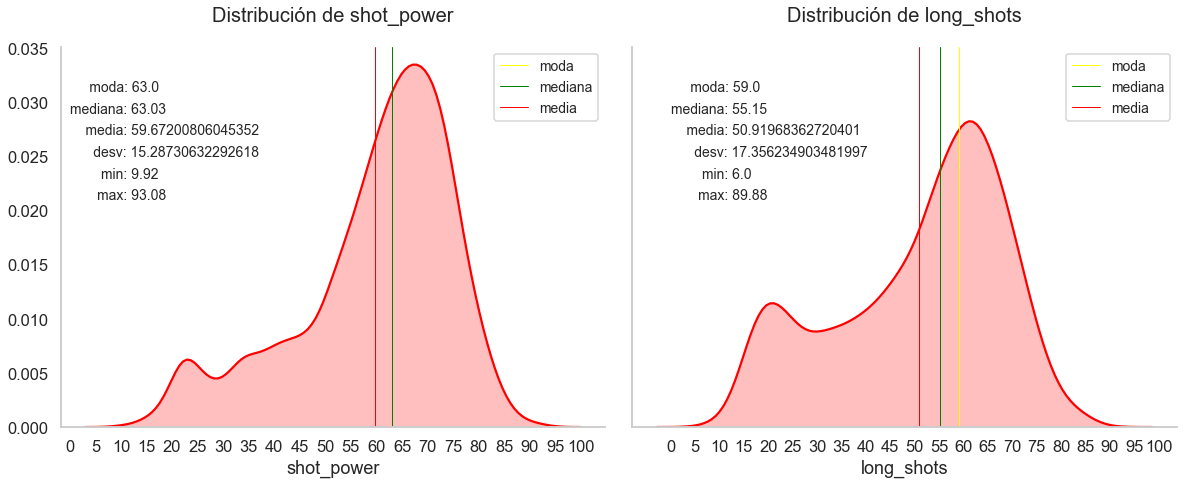

In [16]:
#calculo estadísticos sobre 'shot_power' y 'long_shots' y ploteo...

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7), sharey = True)
plt.subplots_adjust(wspace = .05)

#'shot_power'.
shot_power_mode = df_player['shot_power'].mode().to_string(index = None)
shot_power_median = df_player['shot_power'].median()
shot_power_mean, shot_power_std, shot_power_min, shot_power_max = df_player['shot_power'].describe()[['mean', 'std', 'min', 'max']]

axes[0].title.set_position([0.5, 1.05])
axes[0].set_title('Distribución de shot_power', fontsize = 20)
sns.distplot(df_player['shot_power'], hist = False, ax = axes[0], kde_kws={'shade': True}, color = 'r')

axes[0].axvline(int(df_player['shot_power'].mode()), color = 'yellow', linewidth = 1)
axes[0].axvline(df_player['shot_power'].median(), color = 'green', linewidth = 1)
axes[0].axvline(df_player['shot_power'].mean(), color = 'red', linewidth = 1)

axes[0].text(0, .021, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(shot_power_mode,
                                                                                            str(shot_power_median), str(shot_power_mean),
                                                                                            str(shot_power_std), str(shot_power_min),
                                                                                            str(shot_power_max)), size = 14,
                                                                                             linespacing = 1.7)

axes[0].legend({'moda': shot_power_mode, 'mediana': shot_power_median, 'media': shot_power_mean}, fontsize = 14)
axes[0].grid(False)
axes[0].set_xticks(np.arange(0, 105, 5))

#'long_shots'.
long_shots_mode = df_player['long_shots'].mode().to_string(index = None)
long_shots_median = df_player['long_shots'].median()
long_shots_mean, long_shots_std, long_shots_min, long_shots_max = df_player['long_shots'].describe()[['mean', 'std', 'min', 'max']]

axes[1].title.set_position([0.5, 1.05])
axes[1].set_title('Distribución de long_shots', fontsize = 20)
sns.distplot(df_player['long_shots'], hist = False, ax = axes[1], kde_kws={'shade': True}, color = 'r')

axes[1].axvline(int(df_player['long_shots'].mode()), color = 'yellow', linewidth = 1)
axes[1].axvline(df_player['long_shots'].median(), color = 'green', linewidth = 1)
axes[1].axvline(df_player['long_shots'].mean(), color = 'red', linewidth = 1)

axes[1].text(0, .021, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(long_shots_mode,
                                                                                            str(long_shots_median), str(long_shots_mean),
                                                                                            str(long_shots_std), str(long_shots_min),
                                                                                            str(long_shots_max)), size = 14,
                                                                                             linespacing = 1.7)

axes[1].legend({'moda': long_shots_mode, 'mediana': long_shots_median, 'media': long_shots_mean}, fontsize = 14)
axes[1].grid(False)
axes[1].set_xticks(np.arange(0, 105, 5))

sns.despine()
plt.show()


> Ejercicio 2

Realizar un Análisis de valores atípicos (outliers) de las variables anteriores.

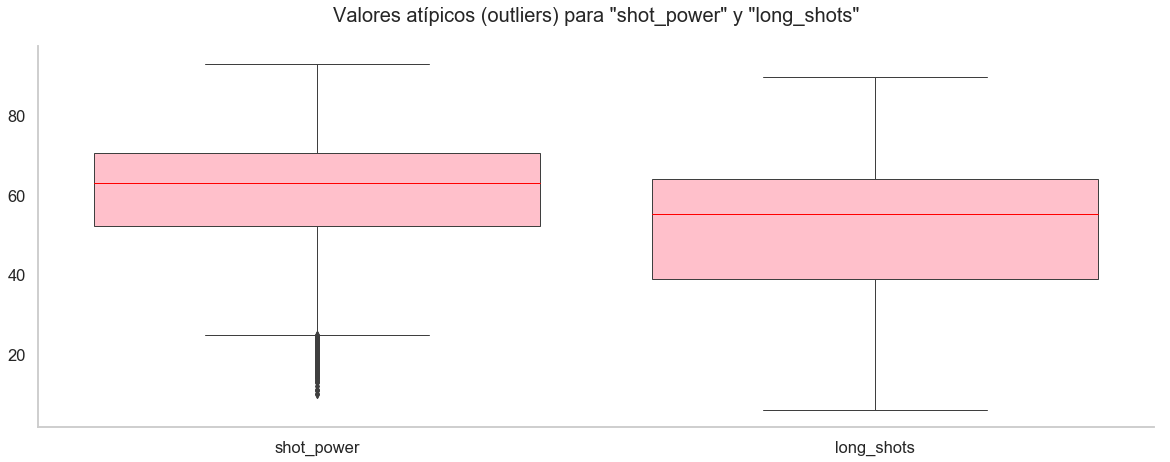

In [19]:
##grafico bloxpots...

plt.figure(figsize = (20, 7))

plt.title('Valores atípicos (outliers) para "shot_power" y "long_shots"', fontsize = 20, pad = 25)
sns.boxplot(data = df_player[['shot_power', 'long_shots']], boxprops = {'facecolor':'pink'}, medianprops = {'color':'r'}, linewidth = 1)
#plt.tick_params(axis = 'both', labelsize = 14)

sns.despine()
plt.grid(False)
plt.show()

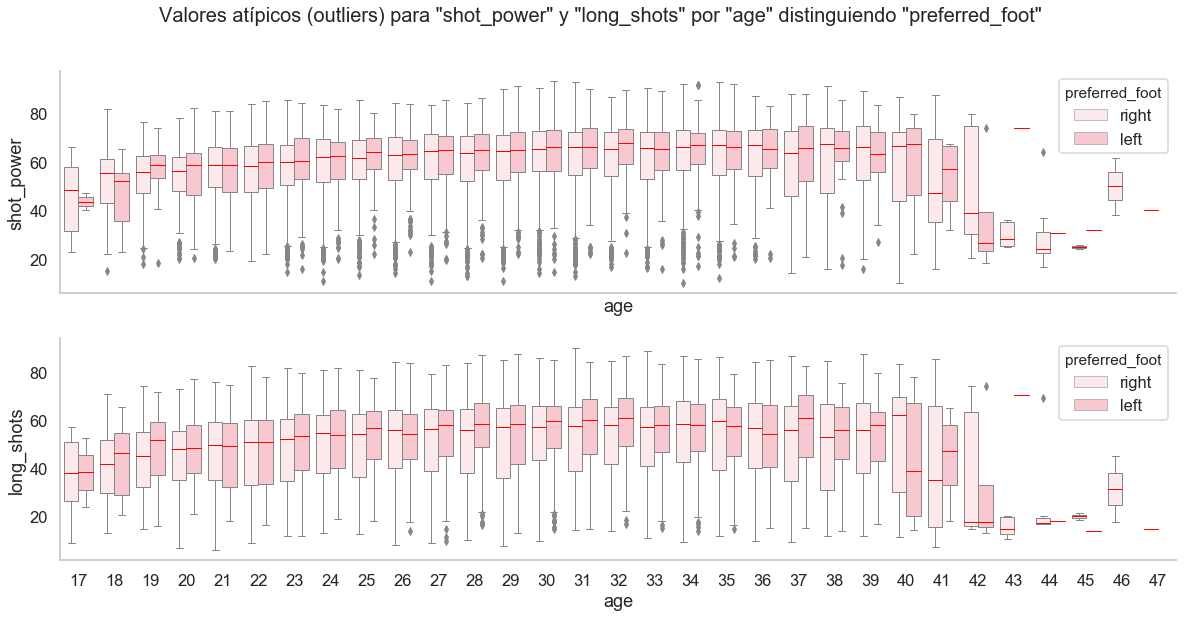

In [20]:
#boxplot por edad distinguiendo pie...

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 9), sharex = True)
#plt.subplots_adjust(hspace = .4)

fig.suptitle('Valores atípicos (outliers) para "shot_power" y "long_shots" por "age" distinguiendo "preferred_foot"', fontsize = 20)

#'shot_power'
sns.boxplot(x = 'age', y = 'shot_power', data = df_player, hue = 'preferred_foot', ax = axes[0], color = 'pink', medianprops = {'color':'r'}, linewidth = 1)
axes[0].grid(False)

#'long_shots'
sns.boxplot(x = 'age', y = 'long_shots', data = df_player, hue = 'preferred_foot', ax = axes[1], color = 'pink', medianprops = {'color':'r'}, linewidth = 1)
axes[1].grid(False)

sns.despine()
plt.show()

> Ejercicio 3

Explicar cómo varía el analisis hecho anteriormente cuando se desglosan por la pierna hábil.  
Comparar cualitativamente y gráficamente ambas distribuciones.

In [21]:
#valores que asume el feature 'preferred_foot'...

print(df_player['preferred_foot'].unique())

['right' 'left']


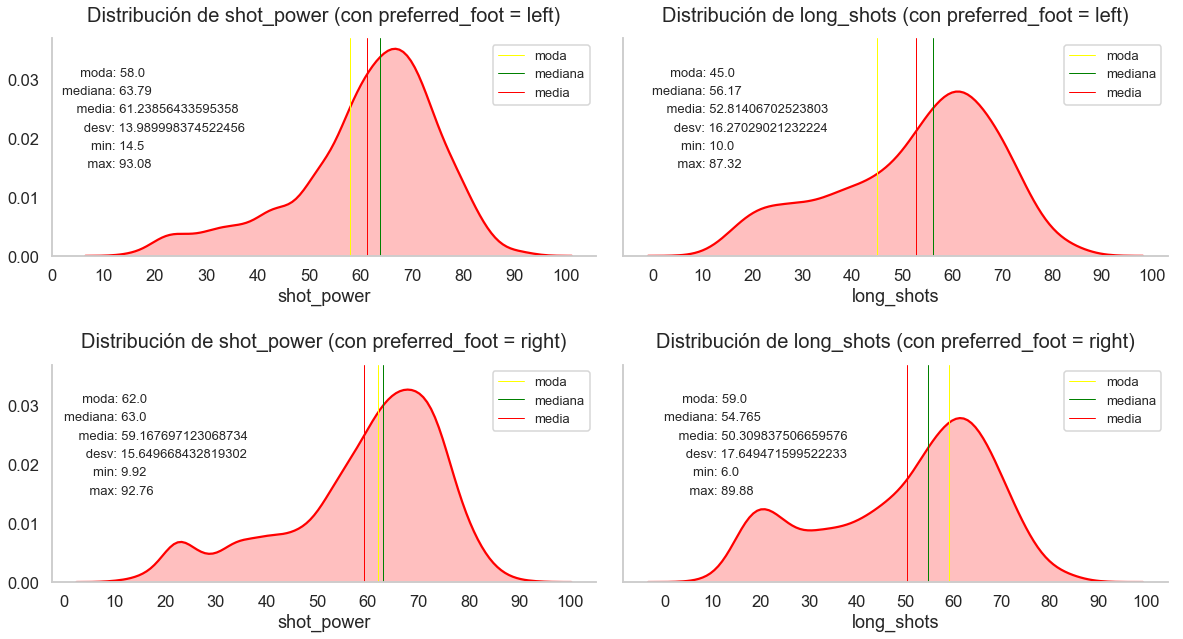

In [22]:
#calculo estadísticos sobre 'shot_power' y 'long_shots' contrastando según 'preferred_foot' y ploteo...

fig, axes = plt.subplots(2, 2, figsize = (20, 10), sharey = True)
plt.subplots_adjust(wspace = .05, hspace = 0.5)

#'shot_power' (left).
df_player_left = df_player[df_player['preferred_foot'] == 'left']

shot_power_mode = df_player_left['shot_power'].mode()[0]
shot_power_median = df_player_left['shot_power'].median()
shot_power_mean, shot_power_std, shot_power_min, shot_power_max = df_player_left['shot_power'].describe()[['mean', 'std', 'min', 'max']]

axes[0, 0].title.set_position([0.5, 1.05])
axes[0, 0].set_title('Distribución de shot_power (con preferred_foot = left)', fontsize = 20)
sns.distplot(df_player_left['shot_power'], hist = False, ax = axes[0][0], kde_kws={'shade': True}, color = 'r')

axes[0, 0].axvline(df_player_left['shot_power'].mode()[0], color = 'yellow', linewidth = 1)
axes[0, 0].axvline(df_player_left['shot_power'].median(), color = 'green', linewidth = 1)
axes[0, 0].axvline(df_player_left['shot_power'].mean(), color = 'red', linewidth = 1)

axes[0, 0].text(2, .015, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(shot_power_mode,
                                                                                            str(shot_power_median), str(shot_power_mean),
                                                                                            str(shot_power_std), str(shot_power_min),
                                                                                            str(shot_power_max)), size = 13,
                                                                                             linespacing = 1.7)

axes[0, 0].legend({'moda': shot_power_mode, 'mediana': shot_power_median, 'media': shot_power_mean}, fontsize = 13)
axes[0, 0].grid(False)
axes[0, 0].set_xticks(np.arange(0, 110, 10))

#'long_shots' (left).
long_shots_mode = df_player_left['long_shots'].mode().to_string(index = None)
long_shots_median = df_player_left['long_shots'].median()
long_shots_mean, long_shots_std, long_shots_min, long_shots_max = df_player_left['long_shots'].describe()[['mean', 'std', 'min', 'max']]

axes[0, 1].title.set_position([0.5, 1.05])
axes[0, 1].set_title('Distribución de long_shots (con preferred_foot = left)', fontsize = 20)
sns.distplot(df_player_left['long_shots'], hist = False, ax = axes[0][1], kde_kws={'shade': True}, color = 'r')

axes[0, 1].axvline(int(df_player_left['long_shots'].mode()), color = 'yellow', linewidth = 1)
axes[0, 1].axvline(df_player_left['long_shots'].median(), color = 'green', linewidth = 1)
axes[0, 1].axvline(df_player_left['long_shots'].mean(), color = 'red', linewidth = 1)

axes[0, 1].text(0, .015, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(long_shots_mode,
                                                                                            str(long_shots_median), str(long_shots_mean),
                                                                                            str(long_shots_std), str(long_shots_min),
                                                                                            str(long_shots_max)), size = 13,
                                                                                             linespacing = 1.7)

axes[0, 1].legend({'moda': long_shots_mode, 'mediana': long_shots_median, 'media': long_shots_mean}, fontsize = 13)
axes[0, 1].grid(False)
axes[0, 1].set_xticks(np.arange(0, 110, 10))

#'shot_power' (right).
df_player_right = df_player[df_player['preferred_foot'] == 'right']

shot_power_mode = df_player_right['shot_power'].mode()[0]
shot_power_median = df_player_right['shot_power'].median()
shot_power_mean, shot_power_std, shot_power_min, shot_power_max = df_player_right['shot_power'].describe()[['mean', 'std', 'min', 'max']]

axes[1, 0].title.set_position([0.5, 1.05])
axes[1, 0].set_title('Distribución de shot_power (con preferred_foot = right)', fontsize = 20)
sns.distplot(df_player_right['shot_power'], hist = False, ax = axes[1][0], kde_kws={'shade': True}, color = 'r')

axes[1, 0].axvline(df_player_right['shot_power'].mode()[0], color = 'yellow', linewidth = 1)
axes[1, 0].axvline(df_player_right['shot_power'].median(), color = 'green', linewidth = 1)
axes[1, 0].axvline(df_player_right['shot_power'].mean(), color = 'red', linewidth = 1)

axes[1, 0].text(0, .015, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(shot_power_mode,
                                                                                            str(shot_power_median), str(shot_power_mean),
                                                                                            str(shot_power_std), str(shot_power_min),
                                                                                            str(shot_power_max)), size = 13,
                                                                                             linespacing = 1.7)

axes[1, 0].legend({'moda': shot_power_mode, 'mediana': shot_power_median, 'media': shot_power_mean}, fontsize = 13)
axes[1, 0].grid(False)
axes[1, 0].set_xticks(np.arange(0, 110, 10))

#'long_shots' (right).
long_shots_mode = df_player_right['long_shots'].mode().to_string(index = None)
long_shots_median = df_player_right['long_shots'].median()
long_shots_mean, long_shots_std, long_shots_min, long_shots_max = df_player_right['long_shots'].describe()[['mean', 'std', 'min', 'max']]

axes[1, 1].title.set_position([0.5, 1.05])
axes[1, 1].set_title('Distribución de long_shots (con preferred_foot = right)', fontsize = 20)
sns.distplot(df_player_right['long_shots'], hist = False, ax = axes[1][1], kde_kws={'shade': True}, color = 'r')

axes[1, 1].axvline(int(df_player_right['long_shots'].mode()), color = 'yellow', linewidth = 1)
axes[1, 1].axvline(df_player_right['long_shots'].median(), color = 'green', linewidth = 1)
axes[1, 1].axvline(df_player_right['long_shots'].mean(), color = 'red', linewidth = 1)

axes[1, 1].text(0, .015, '     moda: {}\nmediana: {}\n    media: {}\n      desv: {}\n        min: {}\n       max: {}'.format(long_shots_mode,
                                                                                            str(long_shots_median), str(long_shots_mean),
                                                                                            str(long_shots_std), str(long_shots_min),
                                                                                            str(long_shots_max)), size = 13,
                                                                                             linespacing = 1.7)

axes[1, 1].legend({'moda': long_shots_mode, 'mediana': long_shots_median, 'media': long_shots_mean}, fontsize = 13)
axes[1, 1].grid(False)
axes[1, 1].set_xticks(np.arange(0, 110, 10))

sns.despine()
plt.show()


> Ejercicio 4

Graficar la correlacion de los features de los jugadores.  
Calcular la correlacion entre los features 'Shot Power' y 'Long Shots' desglosando por la pierna habil.

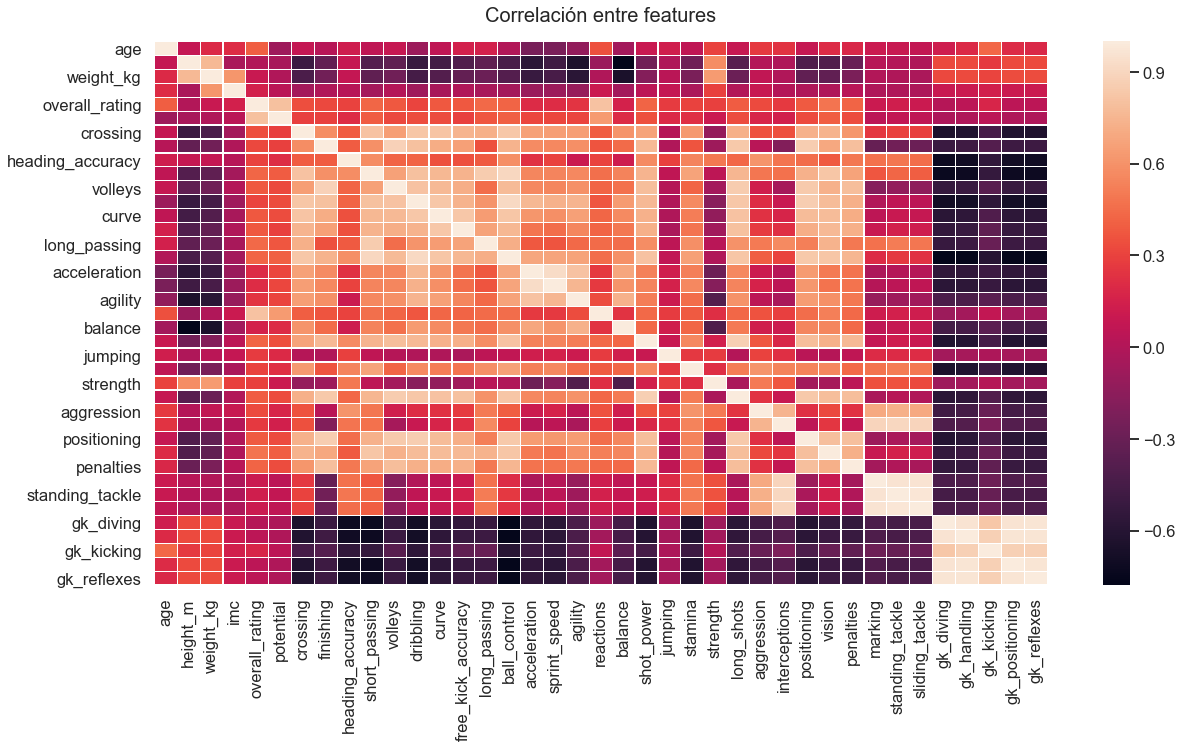

In [23]:
#heatmap de features (todos contra todos)...

plt.figure(figsize = (20, 10))

plt.title('Correlación entre features', fontdict = {'fontsize': 20}, pad = 20)
sns.heatmap(df_player.select_dtypes(exclude = 'object').corr(), linewidths = .2)

plt.show()

In [24]:
#correlación entre 'Shot Power' y 'Long Shots' desglosando por 'preferred_foot'...

#'preferred_foot' (right)...
right = df_player[df_player.preferred_foot == 'right'][['shot_power', 'long_shots']].corr()

#'preferred_foot' (left)...
left = df_player[df_player.preferred_foot == 'left'][['shot_power', 'long_shots']].corr()

pd.concat([right, left], axis = 1, keys = ['pie derecho (right)','pie izquierdo (left)'], names = ['pierna habil:', 'features:'])

pierna habil: pie derecho (right)            pie izquierdo (left)           
features:              shot_power long_shots           shot_power long_shots
shot_power                1.00000    0.86886             1.000000   0.843327
long_shots                0.86886    1.00000             0.843327   1.000000

> Ejercicio 5

Graficar la correlacion de los entre los features 'Weight' y 'Age' de los jugadores. Que conclusiones se obtienen?  
Graficar la correlacion de los entre los features 'Height' y 'Age' de los jugadores. Que conclusiones se obtienen?

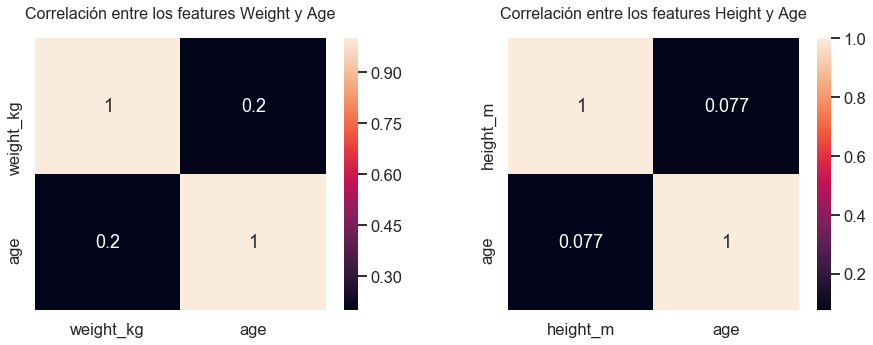

In [25]:
#correlaciones...

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plt.subplots_adjust(wspace = .3)

#... entre los features 'Weight' y 'Age'.
axes[0].set_title('Correlación entre los features Weight y Age', fontsize = 16)
axes[0].title.set_position([0.5, 1.05])
sns.heatmap(df_player[['weight_kg', 'age']].corr(), ax = axes[0], annot = True)

#... entre los features 'Height' y 'Age'.
axes[1].set_title('Correlación entre los features Height y Age', fontsize = 16)
axes[1].title.set_position([0.5, 1.05])
sns.heatmap(df_player[['height_m', 'age']].corr(), ax = axes[1], annot = True)

plt.show()

> Ejercicio 6

Liga Europea con mayor cantidad de partidos

In [26]:
#ranking de ligas europeas por cantidad (absoluta) de juegos...

print()
print('Cantidad de ligas europeas a evaluar: {}\n'.format(df_match['league_name'].nunique()))

df_match.groupby(['league_name']).count().sort_values(by = ['country_name'], ascending = False).country_name.reset_index().rename(columns={'country_name':'#games'})


Cantidad de ligas europeas a evaluar: 11



,league_name,#games
0,England Premier League,3040
1,France Ligue 1,3040
2,Spain LIGA BBVA,3040
3,Italy Serie A,3017
4,Germany 1. Bundesliga,2448
5,Netherlands Eredivisie,2448
6,Portugal Liga ZON Sagres,2052
7,Poland Ekstraklasa,1920
8,Scotland Premier League,1824
9,Belgium Jupiler League,1728


In [27]:
#ranking de ligas europeas con mayor cantidad de juegos por temporada (todos los registros)...

df_match_x_season = df_match.groupby(['season', 'league_name']).count().sort_values(by = ['season', 'country_name'], ascending = False).country_name.reset_index().rename(columns={'country_name':'#games'})
df_match_x_season

,season,league_name,#games
0,2015/2016,England Premier League,380
1,2015/2016,France Ligue 1,380
2,2015/2016,Italy Serie A,380
3,2015/2016,Spain LIGA BBVA,380
4,2015/2016,Germany 1. Bundesliga,306
5,2015/2016,Netherlands Eredivisie,306
6,2015/2016,Portugal Liga ZON Sagres,306
7,2015/2016,Belgium Jupiler League,240
8,2015/2016,Poland Ekstraklasa,240
9,2015/2016,Scotland Premier League,228


In [28]:
#idem anterior pero 'iluminando' los top's...

idx = df_match_x_season[df_match_x_season.groupby(['season'])['#games'].transform(max) == df_match_x_season['#games']].index

df_match_x_season.style.apply(lambda x: ['background: pink' if x.name in idx else '' for i in x], axis = 1)

,season,league_name,#games
0,2015/2016,England Premier League,380
1,2015/2016,France Ligue 1,380
2,2015/2016,Italy Serie A,380
3,2015/2016,Spain LIGA BBVA,380
4,2015/2016,Germany 1. Bundesliga,306
5,2015/2016,Netherlands Eredivisie,306
6,2015/2016,Portugal Liga ZON Sagres,306
7,2015/2016,Belgium Jupiler League,240
8,2015/2016,Poland Ekstraklasa,240
9,2015/2016,Scotland Premier League,228


In [29]:
#ranking de ligas europeas con mayor cantidad de juegos por temporada (solo los top)...

df_match_x_season.iloc[idx]


,season,league_name,#games
0,2015/2016,England Premier League,380
1,2015/2016,France Ligue 1,380
2,2015/2016,Italy Serie A,380
3,2015/2016,Spain LIGA BBVA,380
11,2014/2015,England Premier League,380
12,2014/2015,France Ligue 1,380
13,2014/2015,Spain LIGA BBVA,380
22,2013/2014,England Premier League,380
23,2013/2014,France Ligue 1,380
24,2013/2014,Italy Serie A,380


> Ejercicio 7

Top 10 de Equipos con mayor cantidad de goles convertidos: Total, Local y Visitante

In [30]:
#side by side...
from IPython.display import display_html

def siamesas(*args):
    html_str = ''
    spaciador = '<table style="min-width: 50px !important;"><tr style="min-width: 50px !important; background:none !important;"><td style="min-width: 50px !important;"></td></tr></table>'
    for df in args:
        html_str += df.to_html() + spaciador
        
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)

In [31]:
#top10 equipos con mayor contidad de goles convertidos como LOCAL y VISITANTE...

df_match_rnk_local = df_match.groupby(['home_team_long_name'])['home_team_goal'].sum().reset_index().sort_values(by = ['home_team_goal'], ascending = False)
df_match_rnk_visita = df_match.groupby(['away_team_long_name'])['away_team_goal'].sum().reset_index().sort_values(by = ['away_team_goal'], ascending = False)

siamesas(df_match_rnk_local.head(10), df_match_rnk_visita.head(10))


,home_team_long_name,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
161,Manchester City,365
15,Ajax,360
76,FC Basel,344
162,Manchester United,338
51,Chelsea,333


In [32]:
#top10 equipos con mayor contidad TOTAL de goles convertidos...

def iluminatis_col(s):
    return 'background-color: pink'

df_match_rnk_total = df_match_rnk_local.join(df_match_rnk_visita)[['home_team_long_name', 'home_team_goal', 'away_team_goal']].rename(columns={'home_team_long_name':'equipo', 'home_team_goal':'#goles local', 'away_team_goal':'#goles visita'})
df_match_rnk_total['#goles total'] = df_match_rnk_total.sum(axis = 1)

df_match_rnk_total.sort_values(by = ['#goles total'], ascending = False).head(10).style.applymap(iluminatis_col, subset = pd.IndexSlice[:, ['#goles total']])


,equipo,#goles local,#goles visita,#goles total
75,FC Barcelona,495,354,849
211,Real Madrid CF,505,338,843
49,Celtic,389,306,695
77,FC Bayern Munich,382,271,653
184,PSV,370,282,652
15,Ajax,360,287,647
76,FC Basel,344,275,619
161,Manchester City,365,241,606
51,Chelsea,333,250,583
162,Manchester United,338,244,582


> Ejercicio 8

Distribucion de Cantidad de goles convertidos: Total, Local y Visitante

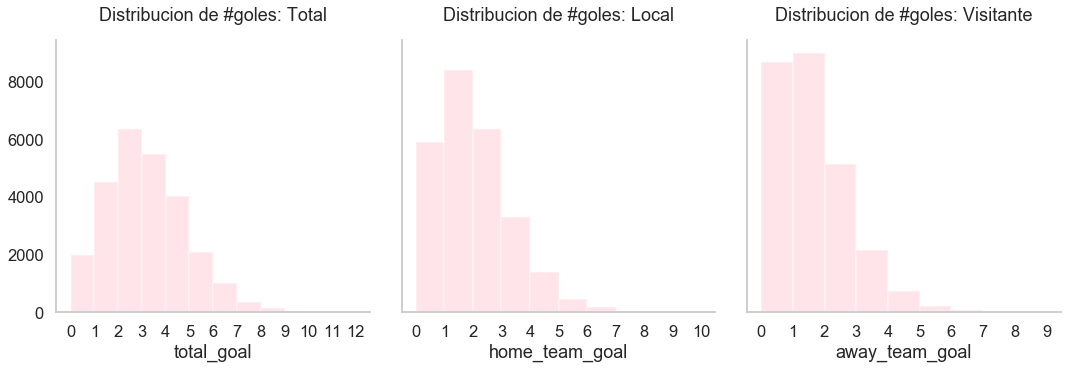

In [36]:
#distribucion de #goles convertidos: Total, Local y Visitante...

fig, axes = plt.subplots(1, 3, figsize = (18, 5), sharey = True)
plt.subplots_adjust(wspace = .1)

#... Total.
max_gol_t = df_match['total_goal'].max()

axes[0].title.set_position([0.5, 1.05])
axes[0].set_title('Distribucion de #goles: Total')
sns.distplot(df_match['total_goal'], kde = False, bins = max_gol_t, ax = axes[0], color = 'pink')
axes[0].set_xticks(np.arange(0, max_gol_t.max() + 1, 1))
axes[0].grid(False)

#... Local.
max_gol_l = df_match['home_team_goal'].max()

axes[1].title.set_position([0.5, 1.05])
axes[1].set_title('Distribucion de #goles: Local')
sns.distplot(df_match['home_team_goal'], kde = False, bins = max_gol_l, ax = axes[1], color = 'pink')
axes[1].set_xticks(np.arange(0, max_gol_l.max() + 1, 1))
axes[1].grid(False)

#... Visitante.
max_gol_v = df_match['away_team_goal'].max()
axes[2].title.set_position([0.5, 1.05])
axes[2].set_title('Distribucion de #goles: Visitante')
sns.distplot(df_match['away_team_goal'], kde = False, bins = max_gol_v, ax = axes[2], color = 'pink')
axes[2].set_xticks(np.arange(0, max_gol_v.max() +1, 1))
axes[2].grid(False)


sns.despine()
plt.show()


> Ejercicio 9

Boxplot de Goles por Temporada

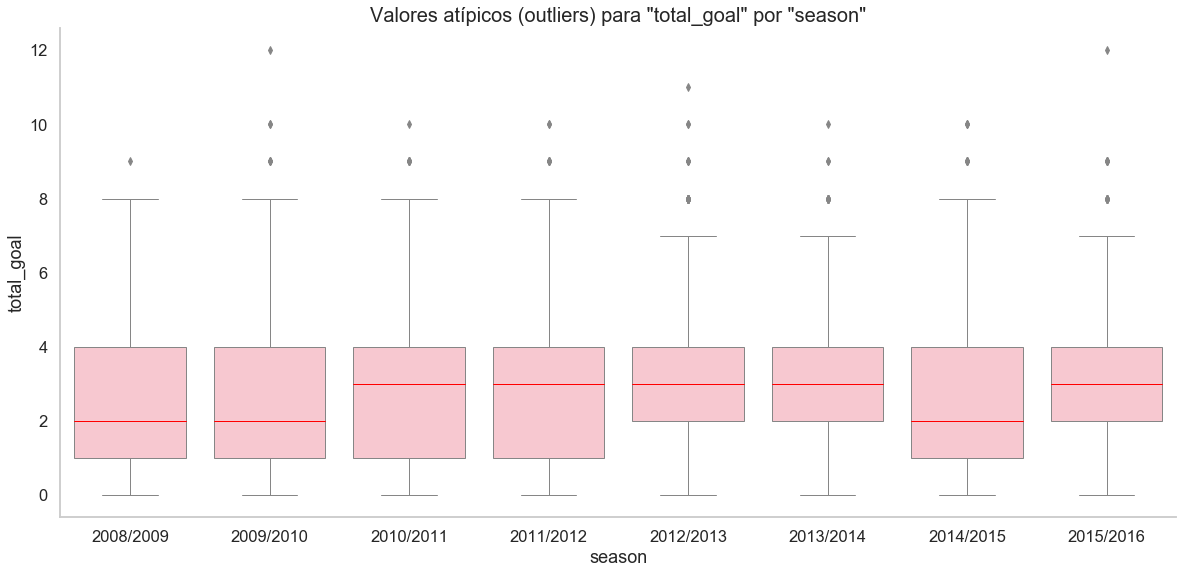

In [40]:
#boxplot de goles totales por temporada...

plt.figure(figsize = (20, 9))

plt.title('Valores atípicos (outliers) para "total_goal" por "season"', fontsize = 20)

sns.boxplot(x = 'season', y = 'total_goal', data = df_match, color = 'pink', medianprops = {'color':'r'}, linewidth = 1)

plt.grid(False)
sns.despine()
plt.show()

> Ejercicio 10

Resumen de Goles convertidos por Temporada: Total, Local y Visitante

In [41]:
#resumen de goles...

df_match.groupby('season')['total_goal', 'home_team_goal', 'away_team_goal'].sum().reset_index().sort_values(by = 'season', ascending = False).style.applymap(iluminatis_col, subset = pd.IndexSlice[:, ['total_goal']])

,season,total_goal,home_team_goal,away_team_goal
7,2015/2016,9162,5135,4027
6,2014/2015,8897,5055,3842
5,2013/2014,8389,4787,3602
4,2012/2013,9039,5053,3986
3,2011/2012,8747,5064,3683
2,2010/2011,8749,5048,3701
1,2009/2010,8632,4978,3654
0,2008/2009,8672,5007,3665


> Ejercicio 11

Proporciones de los resultados de los partidos

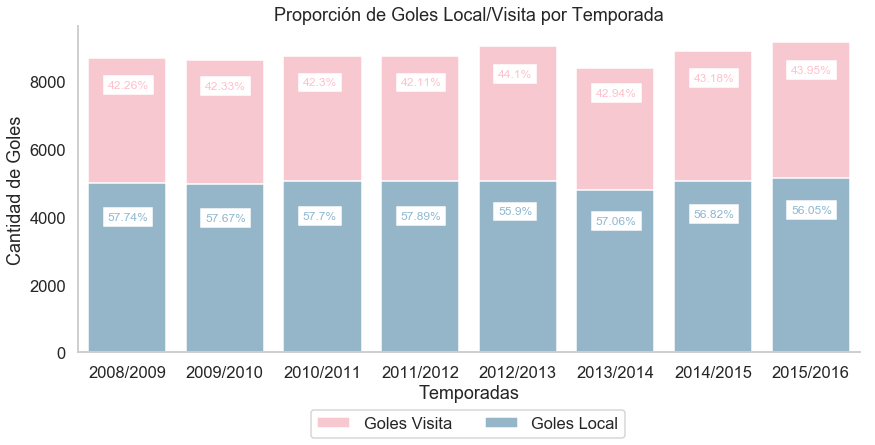

In [43]:
#distribución de goles por temporada...

data = df_match.groupby('season')['total_goal', 'home_team_goal', 'away_team_goal'].sum().reset_index()

fig = plt.figure(figsize = (14, 6))

plt.title('Proporción de Goles Local/Visita por Temporada')
debajo = sns.barplot(x = data.season, y = data.total_goal, color = 'pink', label = 'Goles Visita')
encima = sns.barplot(x = data.season, y = data.home_team_goal, color = '#8db8d0', label = 'Goles Local')

plt.legend(ncol = 2, bbox_to_anchor = (.71, -.15))

encima.set_ylabel('Cantidad de Goles')
encima.set_xlabel('Temporadas')

for i, bucle in enumerate(np.arange(-0.2, 7, 1)):
    plt.text(bucle, (data.total_goal[i] * .45), '{}%'.format(round(data.home_team_goal[i] * 100 / data.total_goal[i], 2)), size = 12, color = '#8db8d0', backgroundcolor = 'w')
    plt.text(bucle, (data.total_goal[i] * .9), '{}%'.format(round(data.away_team_goal[i] * 100 / data.total_goal[i], 2)), size = 12, color = 'pink', backgroundcolor = 'w')

plt.grid(False)
sns.despine()
plt.show()


### **Extra:** Si se les ocurre algún otra métrica que puedan extraer de los datasets, los invito a que la hagan.

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.